In [1]:
import sys 
sys.path.append('../src/')
import ANNNIstates as ANNNI

In [2]:
TT = ANNNI.mps(gpu=True)

In [3]:
TT.train3(epochs=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.04404: 100%|██████████| 1000/1000 [00:33<00:00, 29.93it/s]


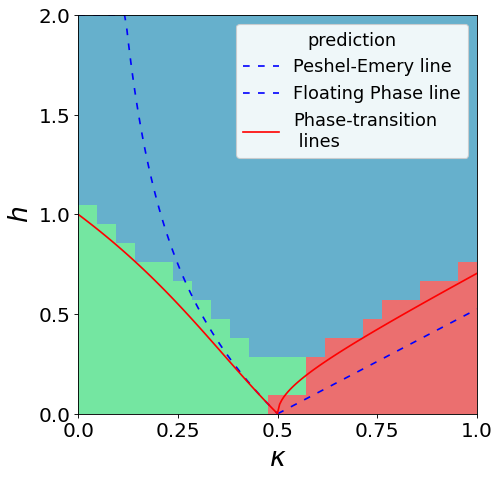

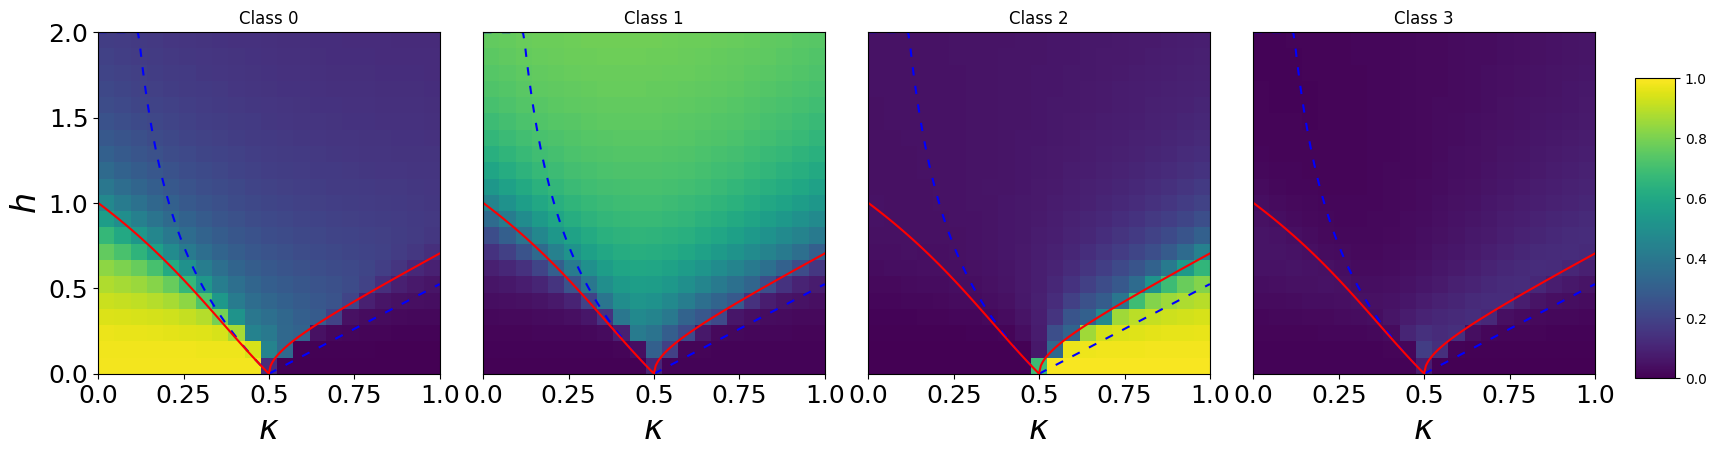

In [4]:
TT.predict(plot=True, eachclass=True)

## Training only using one of the three Phases:

In [10]:
import matplotlib.pyplot as plt
import numpy as np

Loss: 0.01764: 100%|██████████| 500/500 [00:06<00:00, 81.77it/s]


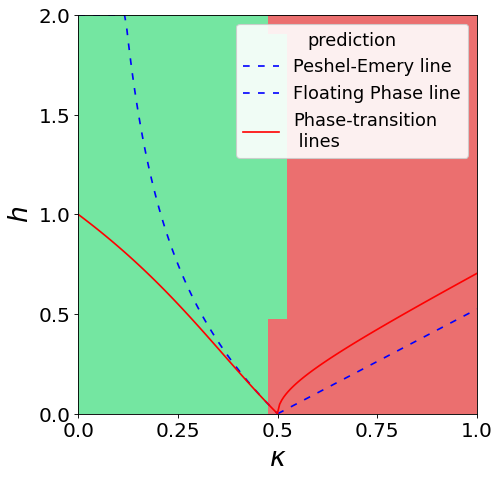

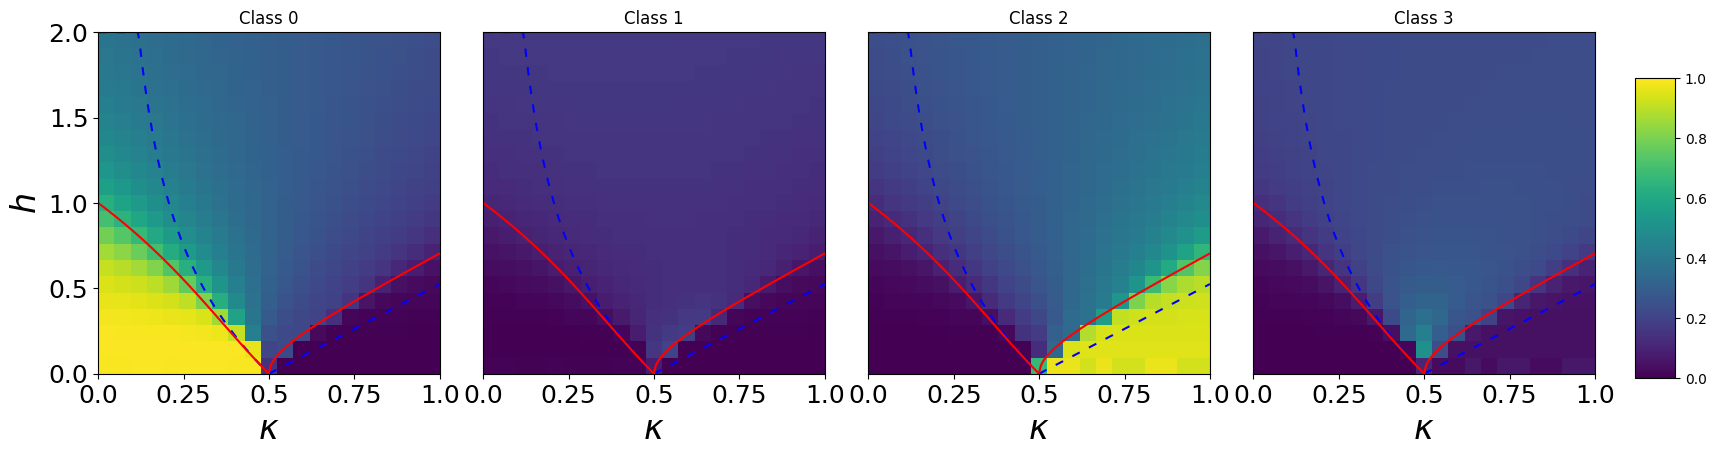

Loss: 0.05670: 100%|██████████| 500/500 [00:03<00:00, 131.85it/s]


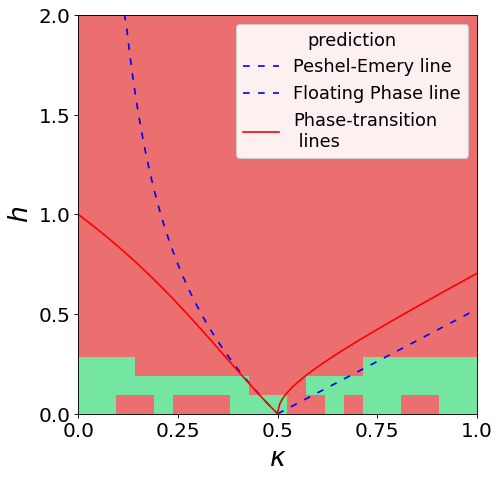

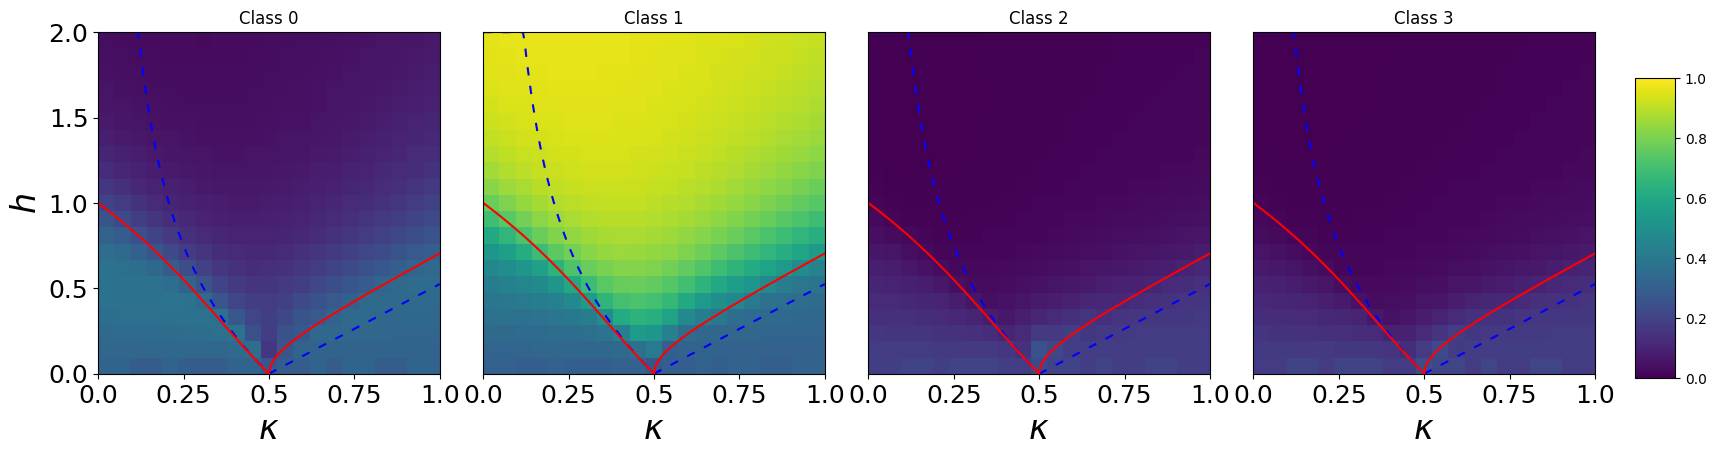

  0%|          | 0/500 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.08282: 100%|██████████| 500/500 [01:38<00:00,  5.08it/s]


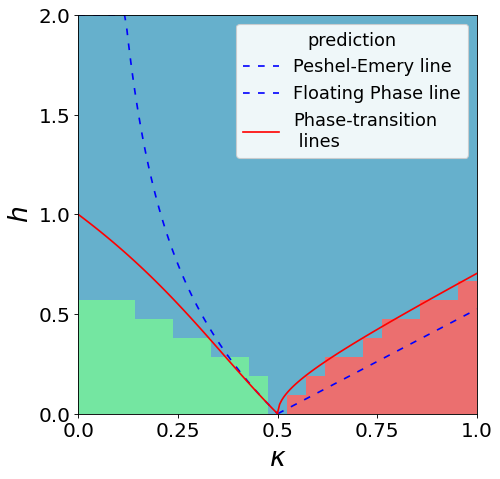

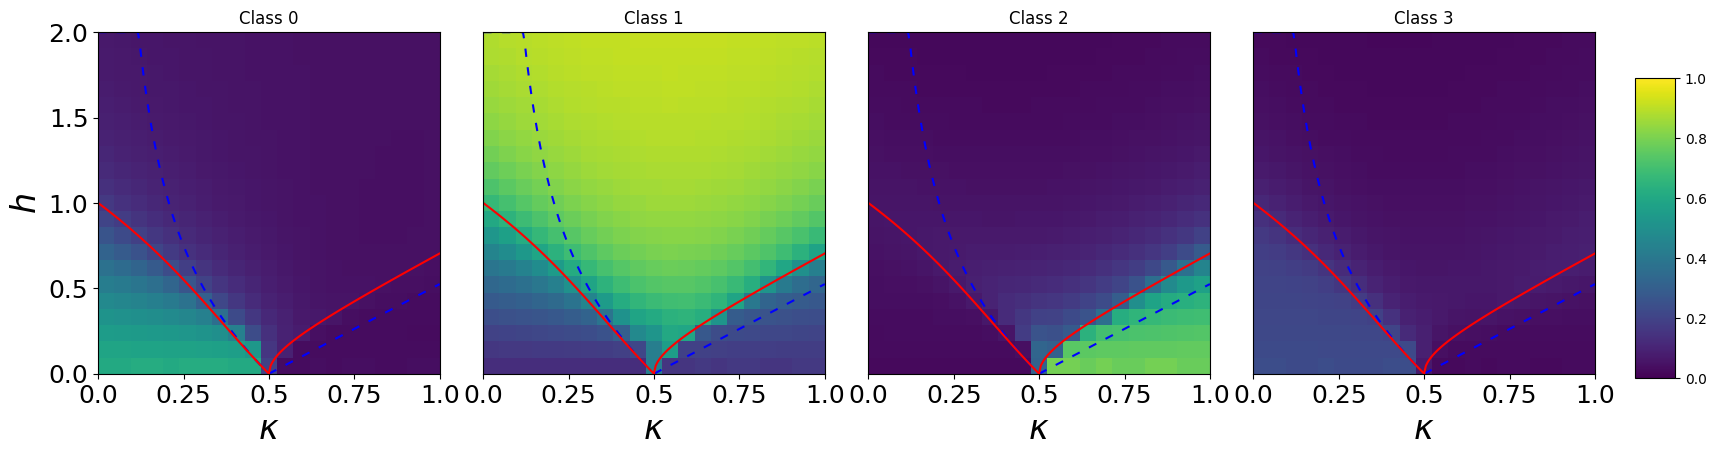

In [12]:
masks = [TT.mask_analitical_ferro, TT.mask_analitical_para, TT.mask_analitical_anti]

for mask in masks:
    TT.qcnn.reset_params()
    TT.train3(epochs=500, train_indices=mask)
    TT.predict(plot=True, eachclass = True)
    plt.show()

## Training only using two of the three Phases:

Loss: 0.05885: 100%|██████████| 500/500 [00:19<00:00, 25.25it/s]


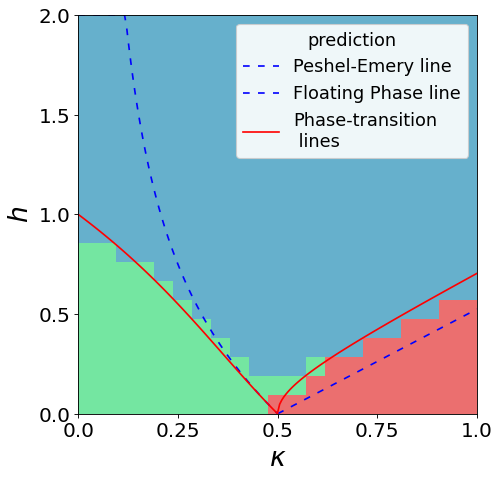

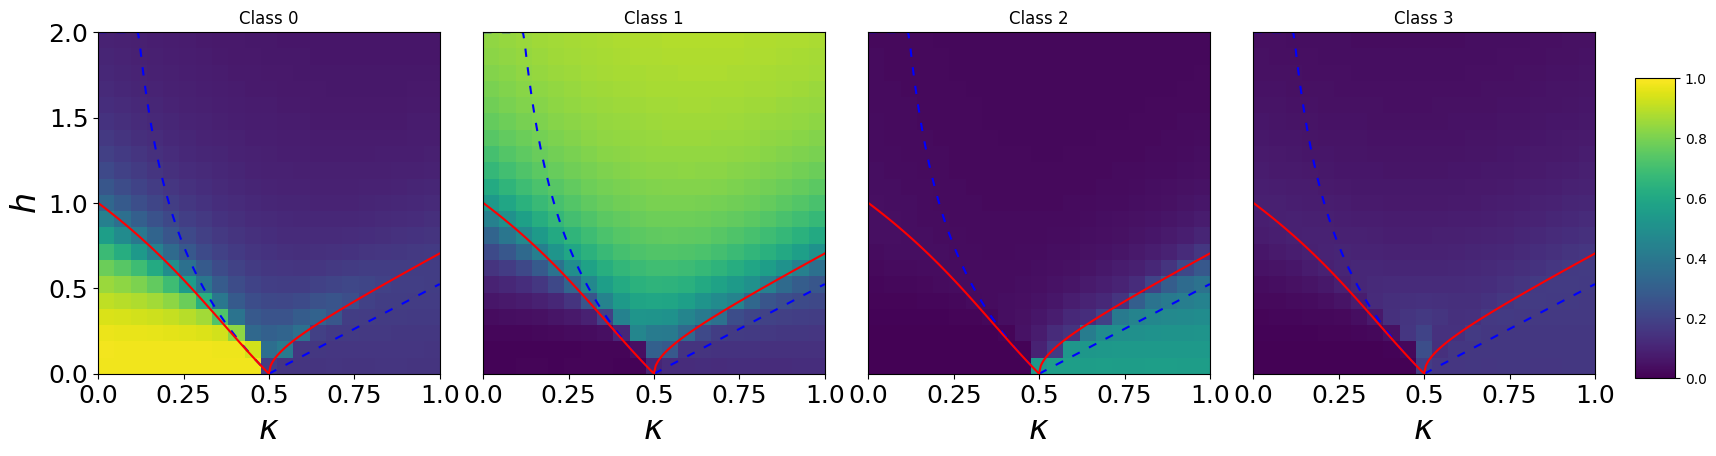

Loss: 0.06529: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


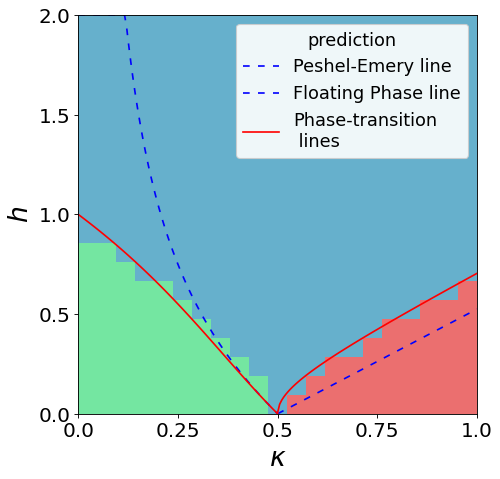

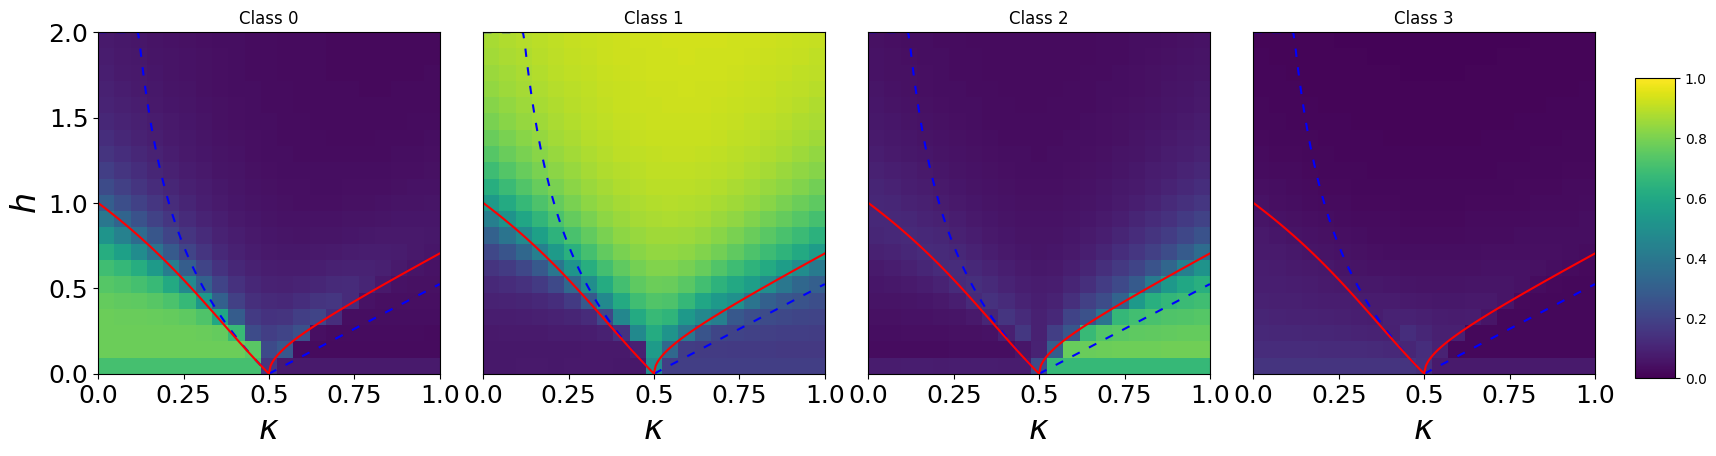

Loss: 0.10353: 100%|██████████| 500/500 [01:23<00:00,  5.96it/s]


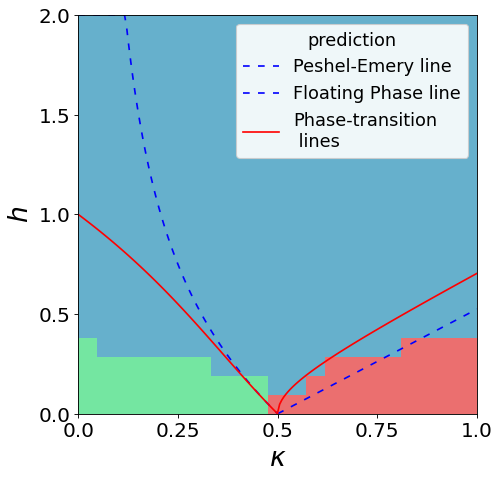

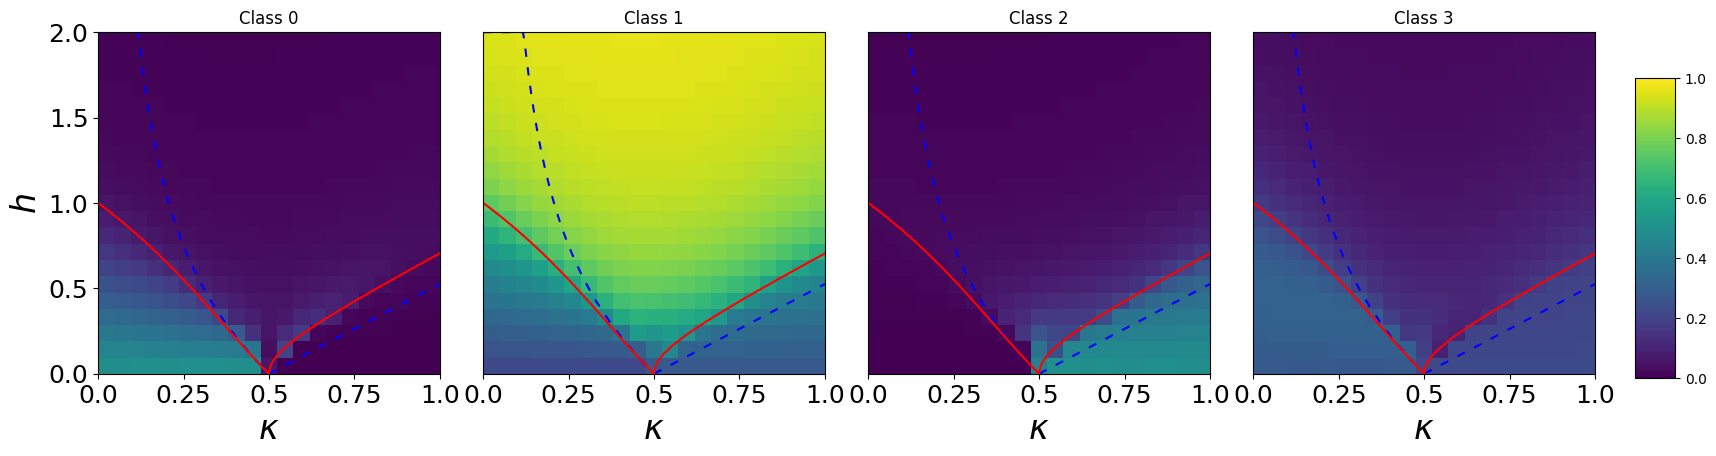

In [13]:
masks2 = [np.logical_or(masks[0], masks[1]), np.logical_not(masks[0], masks[2]), np.logical_not(masks[1], masks[2])]

for mask in masks2:
    TT.qcnn.reset_params()
    TT.train3(epochs=500, train_indices=mask)
    TT.predict(plot=True, eachclass = True)
    plt.show()